In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [11]:
from osprey.actions.forecaster import forecaster_EOF_def, create_forecast_field

In [2]:
from osprey.actions.reader import reader_nemo_field

In [3]:
field_0 = reader_nemo_field(expname='pi00', startyear=1990, endyear=2040, varname='thetao')

2024-12-17 16:48:40,626 - INFO - Data available in the range 1990-2040.


In [18]:
from osprey.utils.time import get_decimal_year

In [45]:
ds = create_forecast_field(expname='pi00', varname='thetao', endleg=21, yearspan=8, yearleap=10, mode='first', smoothing=False)

2024-12-17 17:03:52,796 - INFO - Start/end year: 2002-2009
2024-12-17 17:03:52,801 - INFO - Time window: 8


2024-12-17 17:03:52,845 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_data.nc not found.
2024-12-17 17:03:52,846 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_monthly.nc not found.
2024-12-17 17:03:52,847 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_DJ.nc not found.
2024-12-17 17:03:52,847 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_DJ2.nc not found.
2024-12-17 17:03:52,848 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_winter_2001.nc not found.
2024-12-17 17:04:18,188 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_data.nc successfully removed.
2024-12-17 17:04:18,231 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_monthly.nc successfully removed.
2024-12-17 17:04:18,241 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_DJ.nc successfully removed.
2024-12-17 17:04:18,244 - INFO - File /ec/res4/scratch/itas/martini/pi00/021/aux_DJ2.nc successfully removed.
2024-12-17 17:04:18,245 - INFO - File /ec/res4/sc

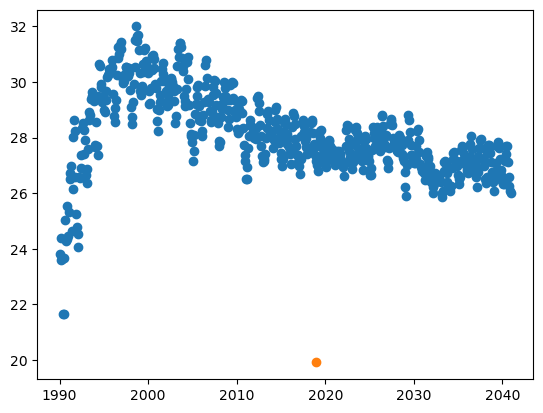

In [51]:
x1=50
y1=70
z1=0

yy = field_0.isel(z=z1,y=y1,x=x1).values
xx = get_decimal_year(field_0['time'].values)

x0 = get_decimal_year(ds['time'].values)
y0 = ds['thetao'].isel(time=0,z=z1,y=y1,x=x1).values

plt.scatter(x=xx, y=yy)
plt.scatter(x=x0, y=y0)

In [3]:
xfield = create_forecast_field(expname='lo01', varname='thetao', endleg=11, yearspan=8, yearleap=10, mode='full', smoothing=False)

2024-12-16 12:03:24,246 - INFO - Start/end year: 1992-1999
2024-12-16 12:03:24,271 - INFO - Time window: 8


2024-12-16 12:03:25,635 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_data.nc not found.
2024-12-16 12:03:25,645 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_monthly.nc not found.
2024-12-16 12:03:25,647 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_DJ.nc not found.
2024-12-16 12:03:25,647 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_DJ2.nc not found.
2024-12-16 12:03:25,648 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_winter_1991.nc not found.
2024-12-16 12:04:16,712 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_data.nc successfully removed.
2024-12-16 12:04:16,738 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_monthly.nc successfully removed.
2024-12-16 12:04:16,741 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_DJ.nc successfully removed.
2024-12-16 12:04:16,743 - INFO - File /ec/res4/scratch/itas/martini/lo01/011/aux_DJ2.nc successfully removed.
2024-12-16 12:04:16,744 - INFO - File /ec/res4/sc

In [5]:
xfield

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 1, y: 148, x: 180, z: 31)
Coordinates:
  * time     (time) object 8B 2009-01-01 00:00:00
    lon      (y, x) float32 107kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    lat      (y, x) float32 107kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
  * z        (z) float32 124B 5.0 15.0 25.0 35.01 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    thetao   (time, z, y, x) float64 7MB dask.array<chunksize=(1, 1, 148, 180), meta=np.ndarray>

In [12]:
field['thetao'].isel(time=0,z=0).max().values

array(32.)

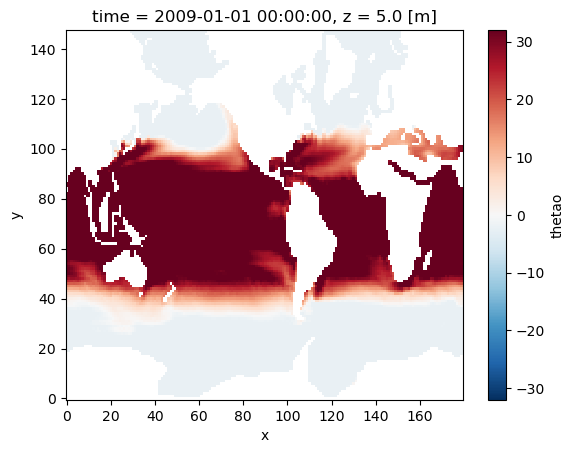

In [14]:
field['thetao'].isel(time=0,z=0).plot()

In [7]:
delta = field['thetao'].isel(time=0,z=0) - xfield['thetao'].isel(time=0,z=0)

In [26]:
delta.min().values

array(-22.23535156)

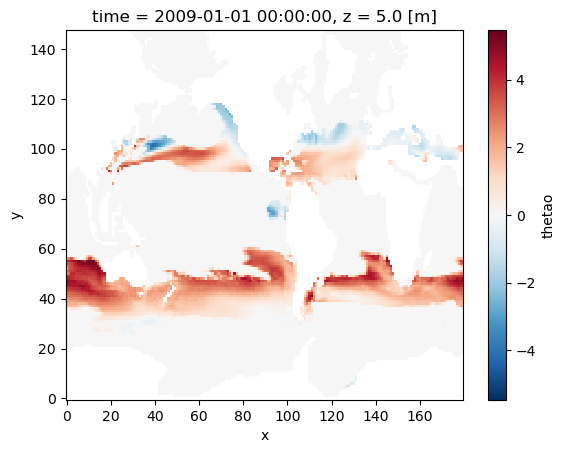

In [8]:
delta.plot()

In [ ]:
import os
expname='lo01'
leg=11
varname='thetao'
tmp = os.path.join("/ec/res4/scratch/itas/martini", expname)
inifile = os.path.join(tmp, str(leg).zfill(3), f"{varname}.nc")


In [8]:
rdata = forecaster_EOF_def(expname=expname, varnames=varnames, endleg=endleg, yearspan=yearspan, yearleap=yearleap, mode='full', smoothing=True)

2024-12-02 16:37:15,365 - INFO - Start/end year: 1995-1999
2024-12-02 16:37:15,371 - INFO - Time window: 5
2024-12-02 16:37:15,400 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/TS01/011/TS01_00058432_restart.nc']
2024-12-02 16:37:15,598 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_data.nc not found.
2024-12-02 16:37:15,603 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_monthly.nc not found.
2024-12-02 16:37:15,604 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_DJ.nc not found.
2024-12-02 16:37:15,604 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_DJ2.nc not found.
2024-12-02 16:37:15,605 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_winter_1994.nc not found.
2024-12-02 16:38:44,563 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_data.nc successfully removed.
2024-12-02 16:38:44,776 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_monthly.nc successfully removed.
2024-12-02 16:38:44,904 - INFO - File /ec

In [3]:
rdata1 = forecaster_EOF_def(expname=expname, varnames=varnames, endleg=endleg, yearspan=yearspan, yearleap=yearleap, mode='first', smoothing=False)

2024-12-02 16:30:42,496 - INFO - Start/end year: 1995-1999
2024-12-02 16:30:42,522 - INFO - Time window: 5
2024-12-02 16:30:44,102 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/TS01/011/TS01_00058432_restart.nc']
2024-12-02 16:32:06,148 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_data.nc not found.
2024-12-02 16:32:06,246 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_monthly.nc not found.
2024-12-02 16:32:06,248 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_DJ.nc not found.
2024-12-02 16:32:06,248 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_DJ2.nc not found.
2024-12-02 16:32:06,256 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_winter_1994.nc not found.
2024-12-02 16:32:53,692 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_data.nc successfully removed.
2024-12-02 16:32:53,723 - INFO - File /ec/res4/scratch/itas/martini/TS01/011/aux_monthly.nc successfully removed.
2024-12-02 16:32:53,728 - INFO - File /ec

In [5]:
rdata1

<xarray.Dataset> Size: 493MB
Dimensions:       (y: 148, x: 180, nav_lev: 31, time_counter: 1, time: 1, z: 31)
Coordinates:
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
  * time_counter  (time_counter) float32 4B 5.843e+04
  * time          (time) object 8B 2009-01-01 00:00:00
    lon           (y, x) float32 107kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    lat           (y, x) float32 107kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
  * z             (z) float32 124B 5.0 15.0 25.0 ... 4.25e+03 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables: (12/41)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    kt            float64 8B ...
    ndastp        float64 8B ...
    adatrj        float64 8B ...
    ntime         float64 8B ...
    ...            ...
    sshn          (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 135, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    tn            (time_counter, nav_lev, y, x, time, z) float64 205MB dask.array<chunksize=(1, 1, 135, 180, 1, 1), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
Attributes:
    file_name:  /ec/res4/scratch/itas/martini/TS01/011/TS01_00058432_restart.nc
    TimeStamp:  28/11/2024 15:37:01 -0000

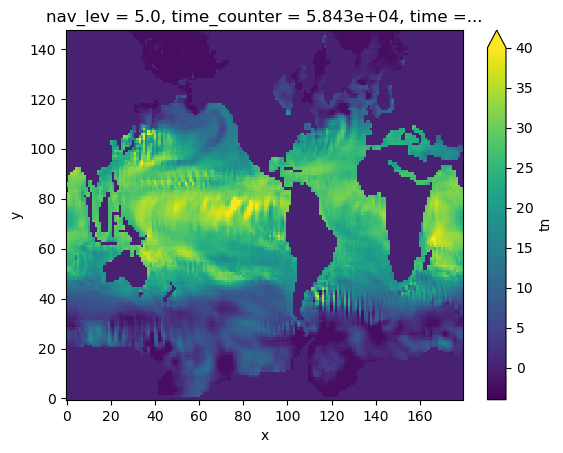

In [7]:
(rdata1['tn'].isel(time_counter=0,nav_lev=0,time=0,z=0)).plot(vmin=-4, vmax=40)

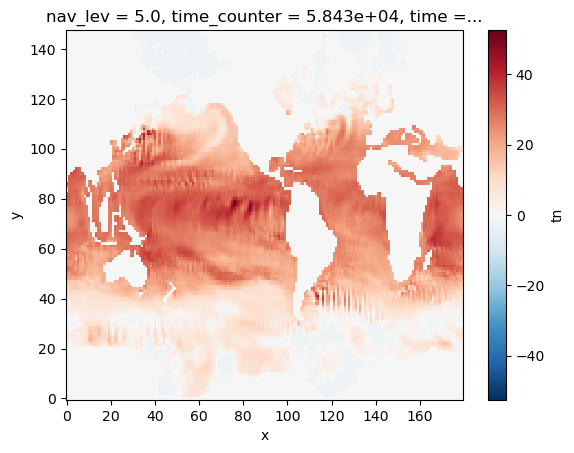

In [11]:
rdata1['tn'].isel(time_counter=0,nav_lev=0,time=0,z=0).plot()